# Week2_6_SpatialData (I)

In today's lab, we continue the topics of data management and visualization but focus on the spatial data analysis. GeoPandas provides powerful tools to perform spatial analysis in Python. Other packages we will cover later, such as Folium and OSMnx, build on the GeoDataFrame capablities of GeoPandas. Specifically, the topics addressed today are shown below: 

<p><a id="table"> </a></p>
<h3 id="Table-of-Contents">Table of Contents<a class="anchor-link" href="#Table-of-Contents">¶</a></h3>

<ol>
    <li>
        <h3>
            <a href="#Geopandas">Geopandas?</a>
        </h3>
    </li>
    <li>
        <h3>
            <a href="#creatingageodataframe">Importing geospatial data</a>
        </h3>
    </li>
    <li>
        <h3>
            <a href="#geopandasforspatialanalysis">Data Exploration with Geopandas</a>
        </h3>
    </li>
    <li>
        <h3>
            <a href="#DealingWithSpatialEquityIssue">Dealing With Spatial Equity Issue</a>
        </h3>
    </li>
    <li>
        <h3>
            <a href="#Writingtoafile">Writing to a file</a>
        </h3>
    </li>
    <li>
        <h3>
            <a href="#MakinganewGeoDataFramefromanon-spatialfile(CSV)">Making a new GeoDataFrame from a non-spatial file (CSV)</a>
        </h3>
    </li>
</ol>


This week's lessons are adapted from:
- Prof.Wenfei Xu's materials from CRP 5680 Spring 2023.
- Automating GIS Processes Lesson 2
- Wenzheng Li's materials from CRP 5680 Spring 2022.



<p><a id="Geopandas"> </a></p>
<h2 id="geopandasforspatialanalysis">1 <a href="#table">Geopandas?</a><a class="anchor-link" href="#geopandasforspatialanalysis">¶</a></h2>


**Geopandas** is a python library that allows us to manage, analyze, and map geospatial vector data. It combines what we have learned the tabular data analysis tools in **Pandas** with what will learn the geometry handling of **shapely**. Geopandas incorporates a python library called **fiona**, which handles all different kinds of spatial file formats, and **pyproj**, which manages our coordinate reference systems.

The main data structures in Geopandas are ``GeoDataFrames`` and ``GeoSeries``, which are intended to mirror the Pandas DataFrame and Series structures. This suggests that **most functionalities of pandas also work in geopandas**.

A GeoDataFrame incorporates three required elements:

- a ***DataFrame (df)***; 
- a ***geometry list*** : this is a column called `geometry` that makes GeoDataFrame different from DataFrame. It defines the geometries related to each row, e.g., points, lines, or polygons.
<figure class="image">
<img src="https://autogis-site.readthedocs.io/en/2019/_images/geodataframe.png" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(From Automating GIS Processes)</figcaption>
</figure>
    
- a ***crs*** (coordinate reference system presented by EPSG code, e.g., "epsg: 4326"); 
    - **EPSG** stands for European Petroleum Survey Group. They publish a database of coordinate system information plus some very good related documents on map projections and datums. Each coordinate system corresponds to a EPSG code. Check the link for more: https://epsg.org/home.html   

## 1.1 Geometric Objects
There are three kinds of geometric objects: 
- **points**: Points are represented by a single coordinate are defined using the `Point` class.
- **lines**: Connecting points together creates a line
- **polygons**: Connecting lines in an enclosed area creates a polygon. 

These are all the different categories of possible geometric objects. 
<figure class="image">
<img src="https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures by M. W. Toews; cf. Wikipedia’s article on GeoJSON)</figcaption>
</figure>

<p><a id="creatingageodataframe"> </a></p>
<h2 id="creatingageodataframe">2 <a href="#table">Importing geospatial data</a><a class="anchor-link" href="#creatingageodataframe">¶</a></h2>


Let's look at some geometry objects.

**Please make sure you have the package Geopandas properly installed before running the following code.** After installing it successfully, import the package `geopandas` and all other required pacakges for this lab: `pandas`, `numpy`, and `matplotlib`.     


In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Today, we will primarily working on two datasets. 
- The first one is the Locations of **NYC Subway Stations**. 
- The second one is **the Locations of the public housing developments** of the New York City Housing Authority (NYCHA) as of January 2024. We will analyze the the public housing accessibility from a transit perspective. 

First, let us read and explore the datasets: 
- download the NYC [Subway Stations](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49) and the [NYCHA public housing data](https://data.cityofnewyork.us/Housing-Development/Map-of-NYCHA-Developments/i9rv-hdr5) from Canvas. These files were originally downloaded from the [NYC OpenData Portal](https://opendata.cityofnewyork.us/).  
- save these (zipped) files in the same folder as your codebook.
- notice that you can keep them as zipped files, as Geopandas can read both the zipped and unzipped version of the shapefile. The NYC OpenData Portal names the unzipped files (e.g., .shp, .prj) difficult to read, so it is better to keep them zipped...

Before we get started, let's orient where we are in our directory:

In [8]:
# get your jupyter notebook path
import os
path = os.getcwd()

We can use the function `gdf.read_file()` to import two files as a GeoDataFrame.

In [55]:
# import the subway station dataset, and assign the file a name: gdf_station
gdf_station = gpd.read_file(path + '/Subway Stations.zip')
gdf_housing = gpd.read_file(path + '/Map of NYCHA Developments.zip')

<p><a id="geopandasforspatialanalysis"> </a></p>
<h2 id="geopandasforspatialanalysis">3 <a href="#table">Data Exploration with Geopandas</a><a class="anchor-link" href="#geopandasforspatialanalysis">¶</a></h2>

### 3.1 Exploring the spatial data

Let us check the first three rows and column names for both datasets.

In [10]:
# check the first three rows: 
gdf_station.head(3)

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)


The subway dataset (in shapefile (.shp) format) contains useful information we need: 

- `objectid` which is the unique ID number for each station
- `name` the name of the station 
- `line` which are all the lines that stop at that station
- `geometry` which is the shapely geometry that distinguishes this data from Pandas DataFrame
- `notes` which is the additionally useful information.

In [11]:
# check the first three rows: 
gdf_housing.head(3)

,borough,developmen,tds_num,geometry
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-73.88092 40.84050, -73.88068 40.840..."
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-73.94445 40.78071, -73.94456 40.780..."
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-73.92039 40.66498, -73.92074 40.664..."


Great! This dataset offers the metadata we need: 
- `borough`: NYC's five county-level administrative divisions (Manhattan - New York County; Bronx - Bronx County; Brooklyn - Kings County; Queens - Queens County; Staten Island - Richmond County).
- `developmen`: Development name.
- `TDS_NUM`: A unique identification number assigned to each development.
- `geometry`: Geometry column.

There's a typo in the column name where "development" is spelled "developmen". Let's fix that.

In [56]:
gdf_housing = gdf_housing.rename(columns={'developmen':'development'})

We can simply use `.plot()` to visualize GeoDataFrame.
   - remember to import the `matplotlib` and run `%matplotlib inline` to allow Jupyter Notebook to display a plot. 

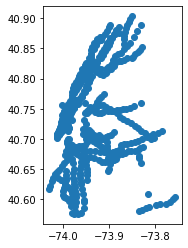

In [13]:
gdf_station.plot()

To make the plot look nicer, we can adjust the plotting parameters:
   - [marker](https://matplotlib.org/stable/api/markers_api.html): sets the shape of the marker used to represent data points in the plot.
   - markersize: sets the size of the markers in the plot
   - color: find the commonly used color [here](https://matplotlib.org/stable/gallery/color/named_colors.html)

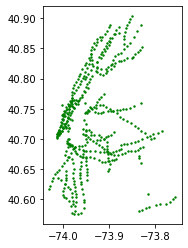

In [14]:
gdf_station.plot(marker='o', color='green', markersize=2)

Let us plot the public housing dataset.
- This look very faint, because we're working with building footprints at the scale of the entire city. That's ok. 

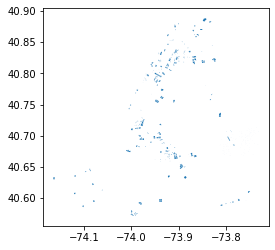

In [15]:
gdf_housing.plot()

We can also check the CRS of the data
- both are EPSG:4326. This is the most widely used global CRS, using latitude and longitude coordinates based on the WGS 84 datum.

In [16]:
gdf_station.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
gdf_housing.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can also check some geometric attributes that are unique to GeoDataFrame.

- obtain the x, y coordinates

In [18]:
gdf_station.geometry.x # x coordinates
gdf_station.geometry.y # y coordinates

0      40.730054
1      40.718803
2      40.761728
3      40.680862
4      40.664714
         ...    
468    40.577281
469    40.755446
470    40.768803
471    40.777861
472    40.784237
Length: 473, dtype: float64

- calculate area. The calculated area is in the current coordinate system. If your data uses a GCS (such as WGS84), the calculated area will be inaccurate. So, make sure your GeoDataFrame uses an appropriate PCS (such as meters or feet).

In [19]:
gdf_housing.area 

C:\Users\Lwz12\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      8.580928e-07
1      1.184057e-06
2      1.006365e-07
3      1.893181e-07
4      2.997259e-07
           ...     
272    6.885382e-07
273    2.271729e-07
274    2.548384e-07
275    2.515271e-07
276    2.411061e-06
Length: 277, dtype: float64

### 3.2 Changing Projections

Both datasets are currently in `EPSG: 4326`, the WGS1984 (World Geodetic System of 1984) with decimal degrees as coordinates. But I want to change my CRS to `EPSG:3857` - WGS 84/Pseudo-Mercator with metre as unit. This is the projected coordinate system (PCS) used for rendering maps in Google Maps, OpenStreetMap, etc.

To project to the target projection coordinate system ('EPSG:3857'), we use `gdf.to_crs()` on the GeoDataFrame.

In [20]:
gdf_station.to_crs(epsg=3857)

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-8236648.235 4972605.859)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-8237663.803 4970953.230)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-8235844.398 4977259.870)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-8234859.237 4965382.255)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-8225941.072 4963012.202)
...,...,...,...,...,...,...
468,D-F-N-Q,Coney Island - Stillwell Av,"D,F,N,Q-all times",469.0,http://web.mta.info/nyct/service/,POINT (-8235553.520 4950189.238)
469,7-7 Express,34th St - Hudson Yards,"7-all times, 7 Express-rush hours AM westbound...",470.0,http://web.mta.info/nyct/service/,POINT (-8237886.898 4976336.703)
470,Q,72nd St,Q-all times,641.0,http://web.mta.info/nyct/service/,POINT (-8233007.174 4978299.664)
471,Q,86th St,Q-all times,642.0,http://web.mta.info/nyct/service/,POINT (-8232273.481 4979631.227)


Now, let us check the crs of our GeoDataFrame to make sure it has changed. 

In [21]:
gdf_station.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice that the CRS is still the EPSG:4326. Why it does not change? 
- `gdf_station.to_crs (epsg=3857)` only returns re-projected geometry. If we do not re-assign our variable name `gdf_station` to this reprojected GeoDataFrame, the old version will not be updated.

Let us assign the revision to a variable name, and check the CRS again.

In [57]:
gdf_station_reprj = gdf_station.to_crs(epsg=3857)

In [23]:
gdf_station_reprj.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

That worked! A good thing about using 3857 is that our units are in meters. This means that when we perform calculations on these geometries, the values we get are also going to be in meters.

Let us also change the CRS of the public housing dataset to `epsg=3857`:

In [58]:
gdf_housing = gdf_housing.to_crs(epsg=3857)

### 3.2 Basic Mapping

Let's talk about mapping in a bit more detail here.

You can also read the [GeoPandas user guide](https://geopandas.org/en/stable/docs/user_guide/mapping.html) for more on mapping. 

We can specify which column will determine the color schema of the plot. If the column is a numeric data type (`int` or `float`) `plot()` will try to create a **choropleth** map, if the column is a `str` or `obj`, it will try to create a **categorical** map. The advanced mapping will be covered in the next lecture.

In [25]:
# The column 'line' is an object type here
gdf_station_reprj['line'].dtype

dtype('O')

In [26]:
# Not surprise, the column 'borough' is an object type here
gdf_housing["borough"].dtype

dtype('O')

Let us now map the subway stations and public housing in the same map. 
   - We can also add a background map (census tract of NYC)
   - To overlay plots of subway and public housing data on the same axes (subplot), you need to ensure that both datasets are plotted on the same Axes object. This can be done by plotting both datasets using the same ax (ax = ax).
   - Since the newly loaded data will be plotted on top of the existing data, unimportant data should be plotted first (e.g., basemap), and then data of interests. Sometimes, we also need to consider the spatial properties of the data (e.g., point data will be covered by polygon data) to decide the plotting order.

In [27]:
# read the census tract shapefile
gdf_CT = gpd.read_file(path + '/2020 Census Tracts.zip')

# change to the same CRS
gdf_CT = gdf_CT.to_crs(epsg=3857)

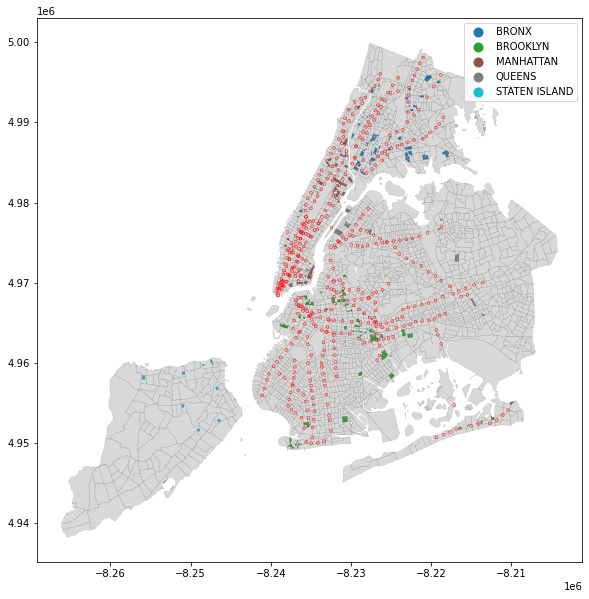

In [28]:
# create a plot
fig, ax = plt.subplots(figsize = (10, 10))

gdf_CT.plot(color='grey', alpha = 0.3, edgecolor='black', linewidth = 0.2, ax = ax)
gdf_station_reprj.plot(marker='o', markersize=8, facecolor="none", edgecolor='red', linewidth =0.5 , ax = ax)
gdf_housing.plot(column="borough", edgecolor='black', linewidth = 0.1, legend=True, ax = ax)

Beyond setting the figure size, I'm including other optional inputs that allows me to style these more clearly. 
- `facecolor` is the fill color, which I want to set to "none" to make the polygons transparent
- `edgecolor` is the edge color, and `plot()` [recognizes certain named colors](https://matplotlib.org/stable/gallery/color/named_colors.html). 
- `linewidth` allows me to set the line weight. 

<p><a id="DealingWithSpatialEquityIssue"> </a></p>
<h2 id="geopandasforspatialanalysis">4 <a href="#table">Dealing With Spatial Equity Issue</a><a class="anchor-link" href="#geopandasforspatialanalysis">¶</a></h2>


### 4.1 Creating a Buffer Area （Service Area)

Now, let us say we want calculate **how many subway stations are within a 10 minute walk of each housing unit**. 

We are going to do this by: 
- Providing an estimate of the distance a typical person can walk in 10 minutes
- Creating a new geometry that is buffered around each building by that distance.

A quick google search tells me 10 minutes is about 800 meters based on average walking speeds. 

Let's make a new dataset that buffers each building with a 800 meter distance, using the `.buffer()` function, but still has the original tabular data of our public housing dataset. Recall that a GeoDataFrame takes a **dataframe, a CRS, and a set of geometries**.

In [29]:
# Make sure that your housing dataset is correctly projected. 
gdf_housing = gdf_housing.to_crs(epsg=3857)

In [30]:
# First, let's make our geometries
buffer_geom = gdf_housing['geometry'].buffer(800)

# Second, we already know the CRS
# This the same as the CRS of public housing data 
buffer_crs = gdf_housing.crs 

# Third, let's grab the data we want
buffer_data = gdf_housing[['borough', 'development', 'tds_num']]  

# Now, let's put it all together using the GeoDataFrame constructor
gdf_housing_buffer = gpd.GeoDataFrame(buffer_data, 
                                      crs=buffer_crs, 
                                      geometry=buffer_geom)

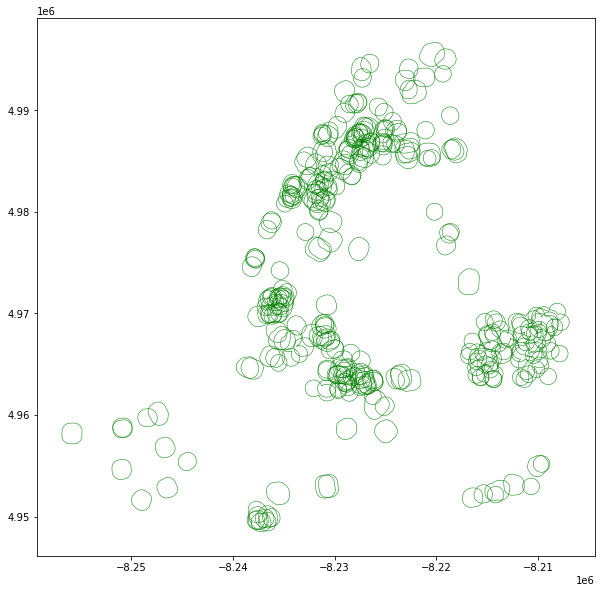

In [31]:
# Note that I've started new lines for each argument 
# to make it easier to read
gdf_housing_buffer.plot(figsize=(10,10),
                            facecolor="none",
                            edgecolor="green", 
                            linewidth=.5)

### 4.2 Spatial join

Now, let us count how many subway stations are in each buffer to get a sense of transit accessibility by using a spatial join between our new `gdf_housing_buffer` dataset and our `subway_stops` dataset. 

We are going to use  `gpd.sjoin(left_geoDF,right_geoDF)`. This function optionally takes as an input `how` to specify what type of spatial join. 

There are couple of different types of spatial joins: 
- `Left outer join`: In a LEFT OUTER JOIN (how='left'), we keep all rows from the left and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right if they intersect and lose right rows that don’t intersect. A left outer join implies that we are interested in **retaining the geometry column of the left**.


- `Right outer join`: In a RIGHT OUTER JOIN (how='right'), we keep all rows from the right and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the left if they intersect and lose left rows that don’t intersect. A right outer join implies that we are interested in **retaining the geometries of the right**.


- `Inner join` (this is the default setting): In an INNER JOIN (how='inner'), we keep rows from the right and left only where their binary predicate is True. We duplicate them if necessary to represent multiple hits between the two dataframes. We **retain attributes of the right and left only if they intersect** and lose all rows that do not. An inner join implies that we are interested in retaining the geometries of the left.


In this case, we want to join `gdf_housing_buffer` and `gdf_stations` and a **left outer join** because we want to keep the hits between our public housing buffer and all the subway stations. 

In [32]:
gdf_housing_buffer

,borough,development,tds_num,geometry
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0..."
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4..."
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-8227994.209 4963201.594, -8227983.2..."
3,BRONX,1162-1176 WASHINGTON AVENUE,233,"POLYGON ((-8226967.873 4988047.243, -8226897.5..."
4,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"POLYGON ((-8231595.644 4983474.449, -8231595.9..."
...,...,...,...,...
272,MANHATTAN,WSUR (BROWNSTONES),178,"POLYGON ((-8235049.879 4981271.489, -8235062.2..."
273,MANHATTAN,WSUR (SITE A) 120 WEST 94TH STREET,151,"POLYGON ((-8233846.752 4982388.142, -8233780.2..."
274,MANHATTAN,WSUR (SITE B) 74 WEST 92ND STREET,173,"POLYGON ((-8233791.860 4982115.411, -8233725.2..."
275,MANHATTAN,WSUR (SITE C) 589 AMSTERDAM AVENUE,174,"POLYGON ((-8234268.566 4982019.499, -8234202.0..."


In [33]:
# Before we assign this to a new variable, 
# let's check to see what the join looks like
gpd.sjoin(gdf_housing_buffer,gdf_station_reprj,how='left')

,borough,development,tds_num,geometry,index_right,line,name,notes,objectid,url
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0...",271.0,2-5,West Farms Sq - E Tremont Av,"2-all times, 5-all times exc nights, skips rus...",272.0,http://web.mta.info/nyct/service/
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0...",284.0,2-5,E 180th St,"2,5-all times",285.0,http://web.mta.info/nyct/service/
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4...",471.0,Q,86th St,Q-all times,642.0,http://web.mta.info/nyct/service/
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4...",472.0,Q,96th St,Q-all times,643.0,http://web.mta.info/nyct/service/
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-8227994.209 4963201.594, -8227983.2...",220.0,3-4,Saratoga Ave,"4-nights, 3-all other times",221.0,http://web.mta.info/nyct/service/
...,...,...,...,...,...,...,...,...,...,...
276,BROOKLYN,WYCKOFF GARDENS,163,"POLYGON ((-8235337.995 4966372.022, -8235270.0...",121.0,D-N-Q-R,Atlantic Av - Barclay's Center,"D,N-all times, R-all times exc nights",122.0,http://web.mta.info/nyct/service/
276,BROOKLYN,WYCKOFF GARDENS,163,"POLYGON ((-8235337.995 4966372.022, -8235270.0...",115.0,2-3-4-5,Atlantic Av - Barclay's Center,"2,4-all times, 3-all times exc nights, 5-weekdays",116.0,http://web.mta.info/nyct/service/
276,BROOKLYN,WYCKOFF GARDENS,163,"POLYGON ((-8235337.995 4966372.022, -8235270.0...",120.0,B-Q,Atlantic Av - Barclay's Center,"B-weekdays and evenings, Q-all times",121.0,http://web.mta.info/nyct/service/
276,BROOKLYN,WYCKOFF GARDENS,163,"POLYGON ((-8235337.995 4966372.022, -8235270.0...",366.0,A-C-G,Hoyt - Schermerhorn Sts,"A,G-all times, C-all times exc nights",367.0,http://web.mta.info/nyct/service/


As we can, see there are duplicate rows of the buffers where each buffered geometry has intersected with multiple stations.

Great, since that looked like it worked, let's assign it to a new variable name: 

In [34]:
gdf_housing_station_sj = gpd.sjoin(gdf_housing_buffer,gdf_station_reprj,how='left')

We can use the `.groupby()` and `.count()` to count the number of subways within the buffer of each public housing. 

In [35]:
# grouped by "development"
station_counts = gdf_housing_station_sj.groupby('development').count()[["objectid"]].reset_index()

Let us look at the distribution of the number of subway stations: 
- use `.value_counts()` to count the frequency of unique values
- use `.hist()` to visualize the distribution

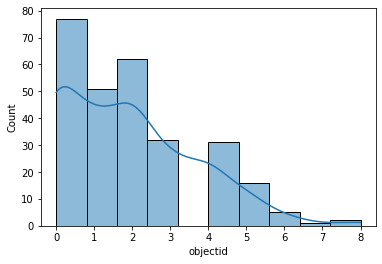

In [37]:
# Add histogram plot using Seaborn
sns.histplot(data=sorted_station_counts, x="objectid", kde = True)

### 4.3 Attribute joins (.merge)

You may notice that the `sorted_station_counts` does not include the spatial information. Now, let's join this back to our `gdf_housing_buffer` GeoDataFrame so we can map it.

In an attribute join, a `GeoSeries` or `GeoDataFrame` is combined with a regular `pandas.Series` or `pandas.DataFrame` based on a common variable. This is analogous to normal merging or joining in pandas.

This is what a merge looks like visually

</figure>
<img src="https://miro.medium.com/max/1400/1*ZCpo3gXuXI4KFhKivEt2ZA.png " alt="drawing" width="700" style="display: block; margin: 0 auto"/>
</figure>




In the .merge() function, try both how = "inner" and how = "left". What is the difference? From the Pandas user guide (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html):

- how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’ 
- Type of merge to be performed.
    - left: use only keys from left frame; preserve key order.
    - right: use only keys from right frame; preserve key order.
    - outer: use union of keys from both frames; sort keys lexicographically.
    - inner: use intersection of keys from both frames; preserve the order of the left keys.

In [38]:
# Find the merge key: 
sorted_station_counts

,development,objectid
90,FHA REPOSSESSED HOUSES (GROUP IX),8
145,LOWER EAST SIDE I INFILL,8
15,ATLANTIC TERMINAL SITE 4B,7
175,OCEAN HILL APARTMENTS,6
130,KING TOWERS,6
...,...,...
193,REHAB PROGRAM (COLLEGE POINT),0
191,RED HOOK WEST,0
93,FHA REPOSSESSED HOUSES (GROUP VII),0
21,BAY VIEW,0


In [39]:
# Find the merge key: 
gdf_housing_buffer

,borough,development,tds_num,geometry
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0..."
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4..."
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-8227994.209 4963201.594, -8227983.2..."
3,BRONX,1162-1176 WASHINGTON AVENUE,233,"POLYGON ((-8226967.873 4988047.243, -8226897.5..."
4,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"POLYGON ((-8231595.644 4983474.449, -8231595.9..."
...,...,...,...,...
272,MANHATTAN,WSUR (BROWNSTONES),178,"POLYGON ((-8235049.879 4981271.489, -8235062.2..."
273,MANHATTAN,WSUR (SITE A) 120 WEST 94TH STREET,151,"POLYGON ((-8233846.752 4982388.142, -8233780.2..."
274,MANHATTAN,WSUR (SITE B) 74 WEST 92ND STREET,173,"POLYGON ((-8233791.860 4982115.411, -8233725.2..."
275,MANHATTAN,WSUR (SITE C) 589 AMSTERDAM AVENUE,174,"POLYGON ((-8234268.566 4982019.499, -8234202.0..."


Now, we can determine that the merge key is development column.

We will now merge `sorted_station_counts` to the `gdf_housing_buffer` that stores spatial information. 

In [40]:
# .merge()
gdf_housing_buffer.merge(station_counts, 
                            left_on='development', 
                            right_on='development')

# we keep the default setting: how='inner' 

,borough,development,tds_num,geometry,objectid
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0...",2
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4...",2
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-8227994.209 4963201.594, -8227983.2...",2
3,BRONX,1162-1176 WASHINGTON AVENUE,233,"POLYGON ((-8226967.873 4988047.243, -8226897.5...",0
4,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"POLYGON ((-8231595.644 4983474.449, -8231595.9...",4
...,...,...,...,...,...
272,MANHATTAN,WSUR (BROWNSTONES),178,"POLYGON ((-8235049.879 4981271.489, -8235062.2...",4
273,MANHATTAN,WSUR (SITE A) 120 WEST 94TH STREET,151,"POLYGON ((-8233846.752 4982388.142, -8233780.2...",2
274,MANHATTAN,WSUR (SITE B) 74 WEST 92ND STREET,173,"POLYGON ((-8233791.860 4982115.411, -8233725.2...",4
275,MANHATTAN,WSUR (SITE C) 589 AMSTERDAM AVENUE,174,"POLYGON ((-8234268.566 4982019.499, -8234202.0...",3


That worked! Let's update our public_housing_buffer variable name to point to our updated geodataframe with this new column.

In [41]:
# .merge()
gdf_housing_buffer = gdf_housing_buffer.merge(station_counts, 
                            left_on='development', 
                            right_on='development')

# we keep the default setting: how='inner' 

The last thing I want to change is the column name from `objectid`, which it is not, to somethign more descriptive. 

In [42]:
gdf_housing_buffer = gdf_housing_buffer.rename(columns={'objectid':'station_count'})
gdf_housing_buffer

,borough,development,tds_num,geometry,station_count
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-8225180.045 4988937.223, -8225178.0...",2
1,MANHATTAN,HOLMES TOWERS,159,"POLYGON ((-8231070.035 4980749.205, -8231003.4...",2
2,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-8227994.209 4963201.594, -8227983.2...",2
3,BRONX,1162-1176 WASHINGTON AVENUE,233,"POLYGON ((-8226967.873 4988047.243, -8226897.5...",0
4,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"POLYGON ((-8231595.644 4983474.449, -8231595.9...",4
...,...,...,...,...,...
272,MANHATTAN,WSUR (BROWNSTONES),178,"POLYGON ((-8235049.879 4981271.489, -8235062.2...",4
273,MANHATTAN,WSUR (SITE A) 120 WEST 94TH STREET,151,"POLYGON ((-8233846.752 4982388.142, -8233780.2...",2
274,MANHATTAN,WSUR (SITE B) 74 WEST 92ND STREET,173,"POLYGON ((-8233791.860 4982115.411, -8233725.2...",4
275,MANHATTAN,WSUR (SITE C) 589 AMSTERDAM AVENUE,174,"POLYGON ((-8234268.566 4982019.499, -8234202.0...",3


### 4.4 Plotting the spatially joined data

Let us now mapping the accessibility to the subway stations. 
- *`cmap`*: a colormap. Other options can be found https://matplotlib.org/tutorials/colors/colormaps.html.
    

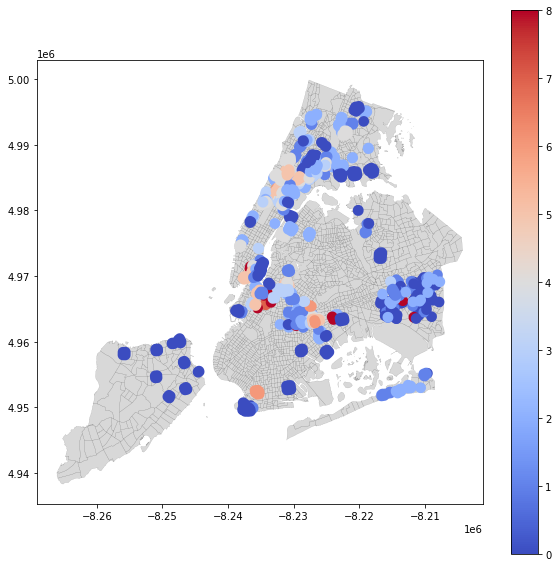

In [43]:
fig, ax = plt.subplots(figsize = (10, 10))

# plot the census tract as the basemap
gdf_CT.plot(color='grey', 
            alpha = 0.3, 
            edgecolor='black', 
            linewidth = 0.2, 
            ax = ax)

# plot the number of subway stations for public housing
gdf_housing_buffer.plot(column = "station_count",
                        cmap = 'coolwarm', # 
                        legend = True, ax = ax)

### 4.5 Spatial Overlay operations

These types of operations allow us to create new geometries from two geodataframes based on certain ways of overlaying these two. 
![](https://geopandas.org/en/stable/_images/overlay_operations.png)

In addition to Buffer and Overlay, the Geopandas package also includes a variety of geospatial processing tools, checking the user guide (https://geopandas.org/docs/user_guide/geometric_manipulations.html) to find the appropriate methods for your analysis. 


Let's say we want to identify those public housing within the 800m threshold and those that are not. We can use the intersection function in `gpd.overlay()`.
- create 800m buffer area of subway stations using `.buffer()`
- convert public houisng from polygon to point using `.centroid()`
- obtian the public housing within the 800m threshold using `intersection` option.
- obtain the public housing outside the 800m threshold using `difference` option.

In [59]:
# Step 1

# First, let's make our geometries
buffer_geom = gdf_station_reprj['geometry'].buffer(800)

# Second, we already know the CRS
# This the same as the CRS of public housing data 
buffer_crs = gdf_station_reprj.crs 

# Third, let's grab the data we want
buffer_data = gdf_station_reprj

# Now, let's put it all together using the GeoDataFrame constructor
gdf_station_buffer = gpd.GeoDataFrame(buffer_data, 
                                      crs=buffer_crs, 
                                      geometry=buffer_geom)



In [65]:
# Step 2: .centroid returns the center point of an object.

gdf_housing['geometry'] = gdf_housing.centroid

In [70]:
# Step 3: obtian the public housing within the 800m threshold using intersection option.

gdf_housing_point_yes = gpd.overlay(gdf_housing, gdf_station_buffer, how='intersection')
gdf_housing_point_yes = gdf_housing_point_yes.dissolve(by = "development") # dissolve by a particular category

In [72]:
# Step 4: obtian the public housing within the 800m threshold using intersection option.

gdf_housing_point_no = gpd.overlay(gdf_housing, gdf_station_buffer, how='difference')

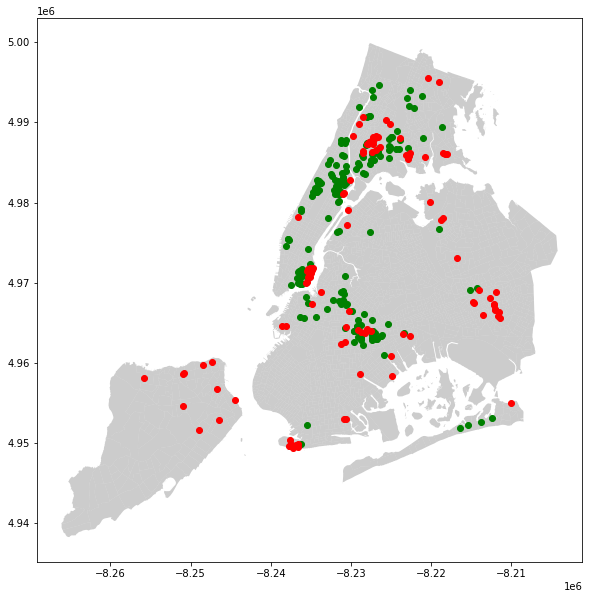

In [78]:
# let us plot the findings: 
fig, ax = plt.subplots(figsize = (10, 10))

gdf_CT.plot(ax = ax, color = "grey", alpha = 0.4)
gdf_housing_point_yes.plot(ax = ax, color = "green")
gdf_housing_point_no.plot(ax = ax, color = "red")

<p><a id="Writingtoafile"> </a></p>
<h2 id="geopandasforspatialanalysis">5 <a href="#table">Writing to a file</a><a class="anchor-link" href="#geopandasforspatialanalysis">¶</a></h2>

Now let us write this buffer data we've created to a file. The default is writing to a shapefile. 

In [200]:
# this will write to a folder containing a .shp, .shx, .dbf, and .prj file
gdf_housing_buffer.to_file('public_housing_buffer')

C:\Users\Lwz12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


In [201]:
# This will write to a single .geojson file
# You need to specify the driver
gdf_housing_buffer.to_file('public_housing_buffer_geojson',driver='GeoJSON')

<p><a id="MakinganewGeoDataFramefromanon-spatialfile(CSV)"> </a></p>
<h2 id="geopandasforspatialanalysis">6 <a href="#table">Making a new GeoDataFrame from a non-spatial file (CSV)</a><a class="anchor-link" href="#geopandasforspatialanalysis"></a></h2>

It is quite common that our dataset is in the format of excel (.xlsx) or .csv but incorporate the coordinate system as two columns. Let us now try to convert these non-spatial files into GeoDataFrames, and further to shapefile. 

Let's say we have a CSV with a latitude and longitude column. We can easily turn this into a GeoDataFrame by transforming these lat/lng shapely `Points`. 

As an example: 
- download the CSV of [NYC Firehouses](https://data.cityofnewyork.us/Public-Safety/FDNY-Firehouse-Listing/hc8x-tcnd). (It's under **Export**.)
- Make sure this CSV is in the same folder as this notebook. 
- remove the date of download on the file name

In [2]:
firehouses_csv = pd.read_csv('FDNY_Firehouse_Listing.csv')
firehouses_csv.head()

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005,40.703694,-74.007717,101,1,7,1000867,1000350001,Battery Park City-Lower Manhattan
1,Engine 6,49 Beekman Street,Manhattan,10038,40.709971,-74.005395,101,1,1501,1001287,1000930030,Battery Park City-Lower Manhattan
2,Manhattan Borough Command/Battalion 1/Engine 7...,100 Duane Street,Manhattan,10007,40.715339,-74.006300,101,1,33,1001647,1001500025,SoHo-TriBeCa-Civic Center-Little Italy
3,Ladder 8,14 N. Moore Street,Manhattan,10013,40.719574,-74.006620,101,1,33,1002150,1001890035,SoHo-TriBeCa-Civic Center-Little Italy
4,Engine 9/Ladder 6,75 Canal Street,Manhattan,10002,40.715408,-73.992834,103,1,16,1003898,1003000030,Chinatown


In order to create a GeoDataFrame, we need to Geopandas all three components: **data/DF, CRS, and geometry** of the GeoDataFrame. We will use the `points_from_xy()` function in GeoPandas. This is basically using shapely `Points` under the hood. 

If your code reports error, try to run the following code to import Point from shapely package
- `from shapely.geometry import Point`

In [4]:
# Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
firehouses = gpd.GeoDataFrame(firehouses_csv, 
                              geometry=gpd.points_from_xy(firehouses_csv['Longitude'], firehouses_csv['Latitude']),
                              crs='EPSG:4326')

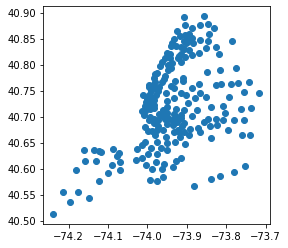

In [5]:
firehouses.plot()

## In-Class Exercise
- (1) Which building or buildings have the highest| number of stations within a 10 min walk? Show the code you used to get this answer. 
- (2) Create a new column called `area` in `public_housing_buffer` that the area of the original building footprints in meters. (Hint: you'll need to do a `merge`.)
- (3) Mapping the accessibility of public transit (subway) for MANHATTAN borough. You can revise the code in section 4.4.
- (4) From the NYC open data portal, download a [shapefile of neighborhoods](https://data.cityofnewyork.us/City-Government/2010-Neighborhood-Tabulation-Areas-NTAs-/cpf4-rkhq)
    - Make sure to change the CRS so it matches the other layers. 
    - Add it to the map in section 4.5 *first* (i.e. below the other layers)
    - Make the fill color of the neighorhoods `lightgray`.


In [80]:
# Q(1) let us sort the data in descending order
sorted_station_counts = station_counts.sort_values(by='objectid', ascending=False)

In [81]:
sorted_station_counts

,development,objectid
90,FHA REPOSSESSED HOUSES (GROUP IX),8
145,LOWER EAST SIDE I INFILL,8
15,ATLANTIC TERMINAL SITE 4B,7
175,OCEAN HILL APARTMENTS,6
130,KING TOWERS,6
...,...,...
193,REHAB PROGRAM (COLLEGE POINT),0
191,RED HOOK WEST,0
93,FHA REPOSSESSED HOUSES (GROUP VII),0
21,BAY VIEW,0


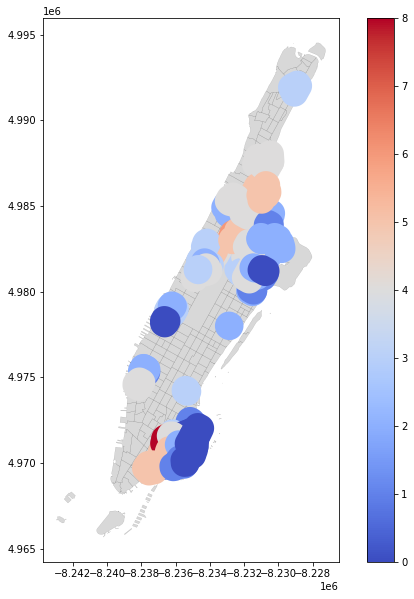

In [79]:
# Q(3)
fig, ax = plt.subplots(figsize = (10, 10))

# plot the census tract as the basemap
gdf_CT[gdf_CT["boroname"] == 'Manhattan'].plot(color='grey', 
                                               alpha = 0.3, 
                                               edgecolor='black', 
                                               linewidth = 0.2, 
                                               ax = ax)

# plot the number of subway stations for public housing
gdf_housing_buffer[gdf_housing_buffer["borough"] == 'MANHATTAN'].plot(column = "station_count",
                                                                      cmap = 'coolwarm', #
                                                                      legend = True,
                                                                      ax = ax)